# GPE examples for a $^{87}Rb$ spinor in F=1,2 


### Introduction
This Notebook gives brief examples on numerical GPE simulations of a mixture of spin-1 and spin-2 BECs under the Single Mode Approximation (SMA). 

Publication avaliable under https://arxiv.org/abs/1904.07617

### Constants

In [1]:
from __future__ import division
import numpy as np
from scipy.constants import physical_constants
import matplotlib.pyplot as plt
import  GPE_SMA_F1F2_Lib as GPE


h=physical_constants["Planck constant"][0]
hbar=physical_constants["Planck constant over 2 pi"][0]
aB=physical_constants["Bohr radius"][0]




m=1.443e-25 #mass of a Rb87 atom (see Rubidium 87 D Line Data, D.Steck)
q=0.89*h
##################################
# Spin matrices for f=1 and f=2
##################################

F1_x=1/np.sqrt(2)*np.array([[0,1,0],[1,0,1],[0,1,0]])
F1_y=1/np.sqrt(2)*np.array([[0,-1j,0],[1j,0,-1j],[0,1j,0]])
F1_z=np.array([[1,0,0],[0,0,0],[0,0,-1]])

F2_x=1/2*np.array([[0,2,0,0,0],[2,0,np.sqrt(6),0,0],[0,np.sqrt(6),0,np.sqrt(6),0],[0,0,np.sqrt(6),0,2],[0,0,0,2,0]])
F2_y=1/2*np.array([[0,-1j*2,0,0,0],[1j*2,0,-1j*np.sqrt(6),0,0],[0,1j*np.sqrt(6),0,-1j*np.sqrt(6),0],[0,0,1j*np.sqrt(6),0,-1j*2],[0,0,0,1j*2,0]])
F2_z=np.array([[2,0,0,0,0],[0,1,0,0,0],[0,0,0,0,0],[0,0,0,-1,0],[0,0,0,0,-2]])



### Scattering parameters

In [2]:
#F=1
a1_0=101.8*aB      
a1_20=-1.07*aB  

g1_0=(4*np.pi*hbar**2/m)*(3*a1_0+2*a1_20)/3
g1_1=(4*np.pi*hbar**2/m)*(a1_20)/3

#F=2
a2_20=3.51*aB      
a2_42=6.95*aB 

g2_1=(4*np.pi*hbar**2/m)*a2_42/7
g2_2=(4*np.pi*hbar**2/m)*(3*a2_42-7*a2_20)/7


#F=1 <-> F=2
a12_12=3.1*aB
a12_32=2.5*aB

a12_12=-1.31*a1_20
a12_32=-1.27*a1_20


g12_1=(4*np.pi*hbar**2/m)*a12_32/3
g12_2=(4*np.pi*hbar**2/m)*(3*a12_12+2*a12_32)/3


### Atom number and effective volume

In [3]:
atomNumber=100e3
omega=92*2*np.pi   #mean trapping frequency
RTF=(g1_0*atomNumber/(m*(omega**2))*15/(4*np.pi))**(1/5.)   #Thomas-Fermi radius
Veff=14./15.*np.pi*RTF**3    #effective volume
print("RTF: %.2f um"%(RTF*1e6))

RTF: 6.63 um


### EXAMPLE (I): f=1

Alignment to orientation conversion for the the initial state:
\begin{equation}
\Psi_0^{(1)}=
\begin{pmatrix}
1/2\\
i\sqrt{2}\\
1/2
\end{pmatrix}
\end{equation}

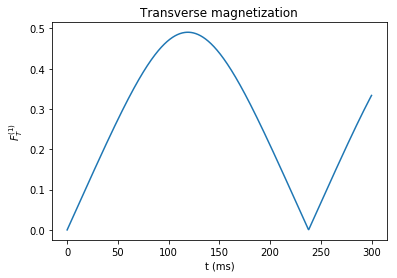

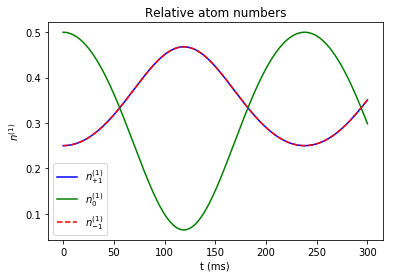

In [4]:
wavefunction1=np.array([1/2,1j/np.sqrt(2),1/2])
wavefunction2=np.array([0,0,0,0,0])

t=np.linspace(0,300e-3,1000)
[w1Array,F1_xArray,F1_yArray,F1_zArray,angle1Array,w2Array,F2_xArray,F2_yArray,F2_zArray,angle2Array]=GPE.SMA_GPE_F12_simulation(t,wavefunction1,wavefunction2,atomNumber,Veff,q,g1_1, g2_1,g2_2,g12_1,g12_2)

F1_TArray=np.sqrt(F1_xArray**2+F1_yArray**2)

n1Array=np.abs(w1Array)**2





plt.figure()
plt.plot(t*1e3,F1_TArray)
plt.xlabel("t (ms)")
plt.ylabel(r"$F_T^{(1)}$")
plt.title("Transverse magnetization")
plt.show()

plt.figure()
plt.plot(t*1e3,n1Array[:,0],"b-",label=r"$n_{+1}^{(1)}$")
plt.plot(t*1e3,n1Array[:,1],"g-",label=r"$n_{0}^{(1)}$")
plt.plot(t*1e3,n1Array[:,2],"r--",label=r"$n_{-1}^{(1)}$")
plt.xlabel("t (ms)")
plt.ylabel(r"$n^{(1)}$")
plt.legend()
plt.title("Relative atom numbers")
plt.show()

### Example  (II): f=1 & f=2 interaction, effective QZS

Effective quadratic Zeeman shift (QZS) due to the inter-hyperfine interaction between f=1 and f=2.
\begin{equation}
\Psi_0=\Psi_0^{(1)}\Psi_0^{(2)}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1/2\\
i/\sqrt{2}\\
1/2
\end{pmatrix}
\begin{pmatrix}
0\\
0\\
0\\
0\\
1
\end{pmatrix}
\end{equation}



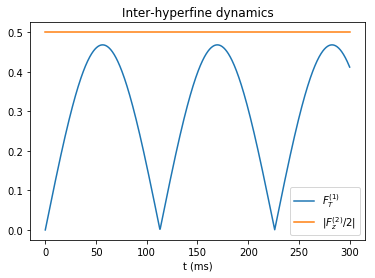

In [5]:
wavefunction1=1/np.sqrt(2)*np.array([1/2.,1j/np.sqrt(2),1/2.])
wavefunction2=1/np.sqrt(2)*np.array([0,0,0,0,1])

t=np.linspace(0,300e-3,1000)
[w1Array,F1_xArray,F1_yArray,F1_zArray,angle1Array,w2Array,F2_xArray,F2_yArray,F2_zArray,angle2Array]=GPE.SMA_GPE_F12_simulation(t,wavefunction1,wavefunction2,atomNumber,Veff,q,g1_1, g2_1,g2_2,g12_1,g12_2)

F1_TArray=np.sqrt(F1_xArray**2+F1_yArray**2)



plt.figure()
plt.plot(t*1e3,F1_TArray,label=r"$F_T^{(1)}$")
plt.plot(t*1e3,np.abs(F2_zArray/2),label=r"$|F_z^{(2)}/2$|")
plt.xlabel("t (ms)")
plt.title("Inter-hyperfine dynamics")
plt.legend()
plt.show()


### Example  (III): f=1 & f=2 interaction, effective LZS
Effective linear Zeeman splitting (LZS) due to the inter-hyperfine interaction between f=1 and f=2.

\begin{equation}
\Psi_{0,A}=\hat{R}_{x,\frac{\pi}{6}}
\begin{pmatrix}
\frac{1}{\sqrt{2}}\\
0\\
0
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}}\\
0\\
0\\
0\\
0
\end{pmatrix} \;\;\;\;\;
\Psi_{0,B}=\hat{R}_{x,\frac{\pi}{6}}
\begin{pmatrix}
0\\
0\\
\frac{1}{\sqrt{2}}
\end{pmatrix}
\begin{pmatrix}
0\\
0\\
0\\
0\\
\frac{1}{\sqrt{2}}
\end{pmatrix}
\end{equation}


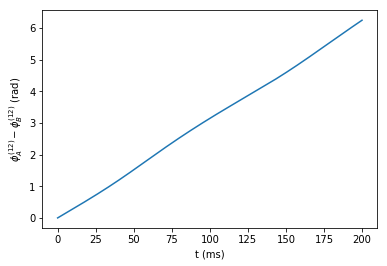

In [6]:
from scipy.linalg import expm

rotAngle=np.pi/6.
R1=expm(-1j*rotAngle*F1_x)
R2=expm(-1j*rotAngle*F2_x)

t=np.linspace(0,200e-3,1000)


#EXPERIMENT A
wavefunction1A=1/np.sqrt(2)*np.array([1,0,0])
wavefunction2A=1/np.sqrt(2)*np.array([1,0,0,0,0])

wavefunction1A=np.dot(R1,wavefunction1A)
wavefunction2A=np.dot(R2,wavefunction2A)


#EXPERIMENT B
wavefunction1B=1/np.sqrt(2)*np.array([0,0,1])
wavefunction2B=1/np.sqrt(2)*np.array([0,0,0,0,1])

wavefunction1B=np.dot(R1,wavefunction1B)
wavefunction2B=np.dot(R2,wavefunction2B)

#Simulation

[_,_,_,_,angle1ArrayA,_,_,_,_,angle2ArrayA]=GPE.SMA_GPE_F12_simulation(t,wavefunction1A,wavefunction2A,atomNumber,Veff,q,g1_1, g2_1,g2_2,g12_1,g12_2)

[_,_,_,_,angle1ArrayB,_,_,_,_,angle2ArrayB]=GPE.SMA_GPE_F12_simulation(t,wavefunction1B,wavefunction2B,atomNumber,Veff,q,g1_1, g2_1,g2_2,g12_1,g12_2)



phi_A=angle1ArrayA+angle2ArrayA
phi_B=angle1ArrayB+angle2ArrayB




deltaPhi=np.unwrap(phi_A-phi_B)
deltaPhi-=deltaPhi[0]


plt.figure()
plt.plot(t*1e3,deltaPhi)
plt.xlabel("t (ms)")
plt.ylabel(r"$\phi_A^{(12)}-\phi_B^{(12)}$ (rad)")
plt.show()
